# Timing of COMBIp vs COMBI etc

In [20]:
%reset -f
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

# Set style of plots
ticksize= 12
titlesize = 16
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

pi2 = 2*np.pi

print(sys.version_info)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


In [2]:
def amdahl(x,p):
    return 1/(1-p + p/x)

# x = np.arange(1,100)
# plt.figure()
# plt.plot(x,amdahl(x,0.5))
# plt.plot(x,amdahl(x,0.99)/x)

In [3]:
# Load file
study=4
bool_weak=0
bool_8 = 1
if study==1:
    suffix = "_inco8"
    xb = [10,8][bool_8]

elif study==2:
    suffix = "_BB8"
    xb = [20,16][bool_8]

elif study==3:
    suffix = "_wake8"
    xb = [10,8][bool_8]
    
elif study==4:
    suffix="_wakeBB8noI"
    xb = [20,16][bool_8]

elif study==5:
    suffix="_wakeBB8s"
    xb = [20,16][bool_8]

    
dirname="timing_COMBIp/"
fname = dirname+"timing_numbers" + suffix
cfname= dirname+"ctiming_numbers" + suffix


dstr = np.genfromtxt(fname,dtype='str')
dstr = dstr[:,6:]
data = np.loadtxt(fname,comments=" .")
cstr = np.genfromtxt(cfname,dtype='str')
cstr = cstr[:,6:]
cdata = np.loadtxt(cfname,comments=" .")

# delimiter
dat=data
for i in range(np.size(dat[:,0])):
    print("%4d %4d %8.4f %4d %4d %s"%(dat[i,0],dat[i,1],dat[i,3],dat[i,4],dat[i,5],dstr[i,0]))
# print(dstr)

   1    1 360.7187   16  100 .10.10.12.10
   1   12  36.8242   16  100 .10.10.12.10
   1    8  52.3597   16  100 .10.10.12.10
   1   12  36.9694   16  100 .10.10.12.10
   1    4  96.6033   16  100 .10.10.12.10
   1    8  52.2091   16  100 .10.10.12.10
   1    2 183.1842   16  100 .10.10.12.10
   1    4  96.4913   16  100 .10.10.12.10
   1    1 359.3926   16  100 .10.10.12.10
   1    1 359.8725   16  100 .10.10.12.10
   1    2 182.6870   16  100 .10.10.12.10
   1   12  36.8216   16  100 .10.10.12.10
   2   16  14.9910   16  100 .10.10.12.10
   1   16  29.4917   16  100 .10.10.12.10
   2   16  15.0051   16  100 .10.10.12.10
   1   12  36.9259   16  100 .10.10.12.10
   1    8  52.1061   16  100 .10.10.12.10
   2   16  14.8695   16  100 .10.10.12.10
   1   16  30.1017   16  100 .10.10.12.10
   2   16  14.7772   16  100 .10.10.12.10
   1    4  96.3400   16  100 .10.10.12.10
   4   16   7.4667   16  100 .10.10.12.10
   1   16  29.3627   16  100 .10.10.12.10
   4   16   8.0693   16  100 .10.1

In [42]:
mpi_time=[[],[],[]]
mpi_cores=[[],[],[]]
mpi_std=[[],[],[]]
# print(mpi_time[2])

In [45]:
#Weak scaling

nproc=data[:,0]
nthrd=data[:,1]
time=data[:,3]/data[:,5]
nbunches=data[:,4]

j=0
for method in [1,2,3]:
    print('method',method)

    if method==1: #omp first
        xthread = np.array([1,2,3,4,5,6,8,10,12,14,16,18,20, 10,10,10])
        xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 ,1 ,1 ,  2,5 ,10])
        xthread = np.array([1,2,3,4,5,6,8,10,12,14,16,18,20, 20,20,20,20,20])
        xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 ,1 ,1 , 2 ,4 ,5 ,8 ,10])
        xthread = np.array([1,2,3,4,5,6,8,10,12,14,16, 16,16,16,16,16])
        xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 , 2 ,4 ,5 ,8 ,10])
        if bool_8:
            xthread = np.array([1,2,3,4,5,6,7,8,10,12,14,16, 16,16,16,16,16])
            xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 ,1,  2 ,4 ,5 ,8 ,10])
        
    elif method==2: # MPI first
        if study==1 or study == 3:
            xprocs = np.array([1,2,3,4,5,6,7,8,9,10, 10,10,10,10,10,10,10,10,10])
            xthread =np.array([1,1,1,1,1,1,1,1,1,1 ,  2,3 ,4 ,5 ,6 ,8, 10,12,16])
        elif study==2:
            xprocs = np.array([1,2,3,4,5,6,7,8,9,10,  20,20,20,20,20,20,20,20,20])
            xthread =np.array([1,1,1,1,1,1,1,1,1,1,    1,2 ,3 ,4 ,5 ,6 ,8 ,10,12])
        elif study==4 or study==5:
            nmpi=4
            if j==2 or study==5:
                xprocs = np.array([1,2,3,4,5,6,7,8,9,10,  20,20,20,20,20,20,20,20,20])
                xthread =np.array([1,1,1,1,1,1,1,1,1,1,    1,2 ,3 ,4 ,5 ,6 ,8 ,10,12])

            elif j==1:
                xprocs = np.array([1,2,3,4,5,6,7,8,9,10, 10,10,10,10,10,10,10,10,10])
                xthread =np.array([1,1,1,1,1,1,1,1,1,1 ,  2,3 ,4 ,5 ,6 ,8, 10,12,16])

            elif j==0:
                xprocs = np.array([1,2,3,4,5,6,7,8,9, 4,4,4,4 ,4 ,4 ,4])
                xthread =np.array([1,1,1,1,1,1,1,1,1, 2,4,8,12,16,20,24])
                
        if bool_8:
            if study==1 or study == 3:
                xprocs = np.array([1,2,3,4,5,6,7,8,8,8,8,8,8,8,8 ,8 ,8 ,8 ,8])
                xthread =np.array([1,1,1,1,1,1,1,1,2,3,4,5,6,8,10,12,14,16,20])
                
                xprocs = np.array([1,2,4,8,8,8,8,8,8,8,8 ,8])
                xthread =np.array([1,1,1,1,2,3,4,5,6,8,16,20])
                
            elif study==2:
                xprocs = np.array([1,2,3,4,5,6,7,8,10,12,16,  16,16,16,16,16,16,16,16,16,16])
                xthread =np.array([1,1,1,1,1,1,1,1,1 ,1 ,1 ,  1 ,2 ,3 ,4 ,5 ,6 ,8 ,10,12,16])
            elif study==4 or study==5:
                nmpi=4
                if j==2 or study==5:
                    xprocs = np.array([1,2,3,4,5,6,7,8,10,12,16,16,16,16,16,16,16,16,16,16])
                    xthread =np.array([1,1,1,1,1,1,1,1,1 ,1 ,1 ,2 ,3 ,4 ,5 ,6 ,8 ,10,12,16])

                elif j==1:
                    xprocs = np.array([1,2,3,4,5,6,7,8,8,8,8,8,8,8,8 ,8 ,8 ,8 ,8])
                    xthread =np.array([1,1,1,1,1,1,1,1,2,3,4,5,6,8,10,12,14,16,20])
                elif j==0:
                    xprocs = np.array([1,2,3,4,4,4,4,4 ,4 ,4 ,4])
                    xthread =np.array([1,1,1,1,2,4,8,12,16,20,24])
                
            
    elif method == 3: # Combi
        xthread=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])    
        if study==1 or study==3:
            xprocs =np.ones_like(xthread)*[11,9][bool_8]
        elif study==2 or study==4 or study == 5:
            xprocs =np.ones_like(xthread)*[21,17][bool_8]
        nproc=cdata[:,0]
        nthrd=cdata[:,1]
        time=cdata[:,3]/cdata[:,5]
        nbunches=cdata[:,4]
        


    N = np.size(xthread)
    avgtime = np.zeros(N)
    stdtime = np.zeros(N)
    ncores = np.zeros(N)
    
    for i in range(N):
        xt = xthread[i]
        xp = xprocs[i]
#         if not (xp in [1,2,4,8]): 
#             continue
#         print(xp)
        ncores[i] = xt*xp
        ind = (nthrd == xt)*(xp == nproc)*(xb==nbunches)
    #     ind = np.logical_and(nthrd == xt, xp == nproc)
        if np.size(time[ind])>0:
            avgtime[i]=np.mean(time[ind])
#             avgtime[i]=np.max(time[ind])
            stdtime[i]=np.std(time[ind])
        else:
            avgtime[i]=np.NaN
            stdtime[i]=np.NaN
            print(xt,xp)
#         print('std',)
    if method<3:
        time_serial = np.mean(time[np.logical_and(nthrd==1,nproc==1)])
    
    ind2 = np.isfinite(avgtime)
    ncores = ncores[ind2]
    avgtime=avgtime[ind2]
    stdtime=stdtime[ind2]

    if method==1:
        omp_time=avgtime
        omp_cores=ncores
        omp_std=stdtime
    elif method==2:
        
        if study==4 :
            mpi_time[j] =avgtime
            mpi_cores[j]=ncores
            mpi_std[j]  =stdtime
        else:
            mpi_time=avgtime
            mpi_cores=ncores
            mpi_std=stdtime
    elif method==3:
        combi_time=avgtime
        combi_cores=ncores
        combi_std=stdtime


method 1
3 1
5 1
6 1
7 1
10 1
14 1
16 5
16 10
method 2
1 3
12 4
20 4
24 4
method 3
5 17
7 17
8 17
9 17
10 17
11 17
12 17
13 17
14 17


$\texttt{COMBI}$
[  17.   34.   51.   68.  102.] [ 1.30515048  0.65595155  0.44487561  0.33868635  0.25168863]
parallel part:  2 [ 0.91009105] [[ 0.00035558]]
efficiency:     [ 0.16229743  0.16146205  0.15871295  0.15635599  0.1402676 ]
ncores:         [  17.   34.   51.   68.  102.]
time            [ 1.30515048  0.65595155  0.44487561  0.33868635  0.25168863]
time std (rel)  [ 0.00095803  0.00254461  0.0053323   0.00202525  0.00703172]
$\texttt{OpenMP}\rightarrow\texttt{MPI}$
[   1.    2.    4.    8.   12.   16.   32.   64.  128.] [ 3.60098359  1.83074056  0.96520863  0.52212905  0.36885275  0.29537623
  0.14910689  0.07597375  0.04641776]
parallel part:  0 [ 0.99474344] [[  7.08628990e-08]]
efficiency:     [ 1.          0.98347731  0.93269566  0.86209138  0.81355491  0.76194851
  0.75469841  0.74058954  0.60607589]
ncores:         [   1.    2.    4.    8.   12.   16.   32.   64.  128.]
time            [ 3.60098359  1.83074056  0.96520863  0.52212905  0.36885275  0.29537623
  0.149106

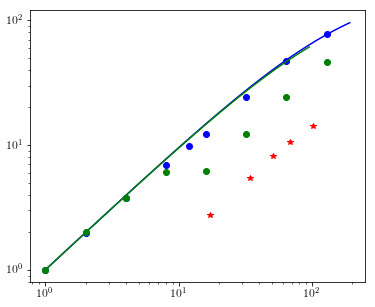

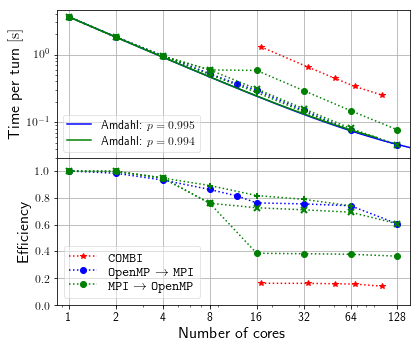

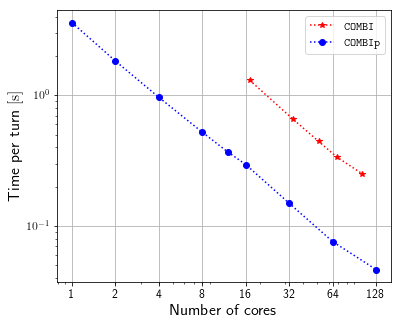

In [48]:
fig2 = plt.figure(2)


fig = plt.figure(1)
ax1 = fig.add_subplot(211)
ax1.set_ylabel(r"Time per turn $[\mathrm{s}]$")
ax2 = fig.add_subplot(212,sharex= ax1)
ax2.set_ylabel("Efficiency")
ax2.set_xlabel("Number of cores")
ax1.grid(True) ; ax2.grid(True)
# ax1.get_xaxis().set_visible(False)


XS = [omp_cores,mpi_cores,combi_cores]
YS = [omp_time,mpi_time,combi_time]
ERRS=[omp_std,mpi_std,combi_std]
cols = ['b','g','r']
ms = ['o','o','*']
labs = [r'$\texttt{OpenMP}\rightarrow\texttt{MPI}$',r'$\texttt{MPI}\rightarrow\texttt{OpenMP}$',r'$\texttt{COMBI}$']
labs2 = [r'$\texttt{COMBIp}$','',r'$\texttt{COMBI}$']
j=0
for i in [2,0,1,1,1]:
    print(labs[i])
    plt.figure(1)
    
    X = XS[i]
    Y = YS[i]
    ERR = ERRS[i]
    c=cols[i]
    lab=labs[i]
    m=ms[i]
    if i==1:
        if study==4 :
            X = XS[i][j]
            Y = YS[i][j]

            print('x',X)
            print('x')
            ERR = ERRS[i][j]
            m=['+','x','o'][j]
            j+=1
            if j==1:
                print('ohoh')
                print(X,Y)
                popt,pcov = curve_fit(amdahl,X,time_serial/Y)
                temp = np.arange(1,np.max(X)*1.5)
                ax1.loglog(temp,time_serial/amdahl(temp,popt),cols[i],label=r"Amdahl: $p=%.3f$"%popt)
            if j<3:
                ax1.loglog(X,Y,':'+m+c,mew=2)
                ax2.semilogx(X,time_serial/Y/X,':'+m+c,mew=2)
                continue
        else:
            j+=1
            if j>1:
                continue
        
    
    
    ax1.loglog(X,Y,':'+m+c)
    ax2.semilogx(X,time_serial/Y/X,':'+m+c,label=lab)
    
    
#     ax1.errorbar(XS[i],YS[i],yerr=ERRS[i],fmt=':',c=cols[i])
    
    #Amdahl
    if i!=1:
        print(X,Y)
        popt,pcov = curve_fit(amdahl,X,time_serial/Y)
        temp = np.arange(1,np.max(X)*1.5)
        if i<2:
            None
            ax1.loglog(temp,time_serial/amdahl(temp,popt),cols[i],label=r"Amdahl: $p=%.3f$"%popt)
    #         ax2.semilogx(temp,amdahl(temp,popt)/temp,cols[i])
    print('parallel part: ', i,popt, pcov)
    print('efficiency:    ',time_serial/Y/X)
    print('ncores:        ',X)
    print('time           ',Y)
    print('time std (rel) ',ERR/Y)
    
    plt.figure(2)
    plt.loglog(X,time_serial/Y,''+m+c)
    if i<2:
        plt.loglog(temp,amdahl(temp,popt),c,label=r"Amdahl: $p=%.3f$"%popt)
        
    if i!=1:
        plt.figure(3)
        plt.loglog(X,Y,':'+m+c,label=labs2[i])
    
plt.figure(1)
ax2.set_ylim(0.,1.1)
ax2.legend(loc=0,framealpha=0.5,labelspacing=0.1,fontsize=14)
ax1.legend(loc=0,framealpha=0.5)
ax1.set_xticks(2**np.arange(8))
ax2.set_xticks(2**np.arange(8))
ax2.set_xlim(1/1.2,128*1.2)
ax1.tick_params(labelbottom=False)
ax2.set_xticklabels(2**np.arange(8))

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("00_Plots/PHPC_strongscaling"+suffix+".png")
plt.savefig("00_Plots/PHPC_strongscaling"+suffix+".eps")


plt.figure(3)
plt.ylabel(r"Time per turn $[\mathrm{s}]$")
plt.xlabel("Number of cores")
plt.grid(True)
plt.legend(loc=0)
plt.xticks(2**np.arange(8),2**np.arange(8))

# plt.figure(2)
print("COMBIp vs COMBI Inco",1.88864589/2.10853698)
print("COMBIp vs COMBI BB  ",6.45003585/3.21257443)
print("COMBIp vs COMBI wake",2.26927332/2.53937046)
print("COMBIp vs COMBI waBB",7.23587496/3.88012359)


# Weak scaling

Weak scaling

8 bunch per 8 core (openmp)

1 bunch per 8 core (openmp)

1 bunch per 1 core 

cant overwrite 

In [11]:
# Load file
study=1
bool_weak=1
if study==1:
    wsuffix = "_inco_weak"
elif study==2:
    wsuffix = "_BB_weak"
    
wsuffix = "_weak"

dirname="timing_COMBIp/"
wfname = dirname+"timing_numbers" + wsuffix
wcfname= dirname+"ctiming_numbers" +wsuffix

dstr = np.genfromtxt(wfname,dtype='str')
dstr = dstr[:,6]
wdata = np.loadtxt(wfname,comments=" .")
# if not bool_weak:
#     cdata = np.loadtxt(cfname,comments=" .")
print(wdata[dstr=='.10.10.10.12.3',:])



[[   2.          8.          0.559218    5.258943    2.        100.      ]
 [   2.          8.          0.550851    5.246208    2.        100.      ]
 [   2.          8.          0.554288    5.217951    2.        100.      ]
 [   2.          8.          0.572256    5.273071    2.        100.      ]
 [   1.          8.          4.378216   49.709612    8.        100.      ]
 [   1.          8.          4.316731   50.120409    8.        100.      ]
 [   1.          8.          4.318044   50.104362    8.        100.      ]
 [   1.          8.          4.341098   49.858223    8.        100.      ]
 [   4.          8.          0.564991    6.703534    4.        100.      ]
 [   4.          8.          0.561295    6.762661    4.        100.      ]
 [   4.          8.          0.569804    6.726893    4.        100.      ]
 [   4.          8.          0.560318    6.751426    4.        100.      ]
 [   2.          8.          4.331362   68.871755   16.        100.      ]
 [   2.          8.      

In [17]:
# ## Strong scaling
# method=3

# nproc=wdata[:,0]
# nthrd=wdata[:,1]
# nbunches=wdata[:,4]
# time=wdata[:,3]/wdata[:,5]

# xprocs = np.array([1,2,4,8,16,32,64,128])
# if method==1: #1 bunch per 1 process
#     xthread = np.ones_like(xprocs)*1
#     xbunches= xprocs
# elif method==2: # 8 bunch per 8 procs
#     xthread = np.ones_like(xprocs)*8
#     xbunches= xprocs*xthread
# elif method == 3: # 1 bunch per 8 procs
#     xthread = np.ones_like(xprocs)*8
#     xbunches= xprocs
    

# N = np.size(xthread)
# avgtime = np.zeros(N)
# ncores = np.zeros(N)
# for i in range(N):
#     xt = xthread[i]
#     xp = xprocs[i]
#     xb = xbunches[i]
#     ncores[i] = xt*xp
#     ind = (nthrd == xt)*(xp == nproc)*(xb==nbunches)
#     if np.size(time[ind])>0:
#         avgtime[i]=np.mean(time[ind])
#     else:
#         avgtime[i]=np.NaN
#         print(xt,xp)
        

# time1 = np.mean(time[np.logical_and(nthrd==1,nproc==1)])

# ind2 = np.isfinite(avgtime)
# ncores = ncores[ind2]
# avgtime=avgtime[ind2]

# if method==1:
#     time11=avgtime
#     cores11=ncores
# elif method==2:
#     time88=avgtime
#     cores88=ncores
# elif method==3:
#     time18=avgtime
#     cores18=ncores

# print(xthread)
# print(xprocs)
# print(xbunches)
# print(avgtime)
# print(ncores)
# print(xbunches[ind2])


## Strong scaling
core_combi=1
time_combi=1

nproc=wdata[:,0]
nthrd=wdata[:,1]
nbunches=wdata[:,4]
time=wdata[:,3]/wdata[:,5]



method=1  # 1.1   8.8    1.8
combi_study=1
strings = ['.3','.10.10.10.3','.12.3','.10.10.10.12.3','.10.10.12.10','.']
strings = ['.3','.10.10.10.3','.12.3','.10.10.3.12.3.10','.10.10.12.10','.']
for study in [0,1,2,3,4,5]:
    if study == 5 and method>1.5: 
        continue
    xstrn = strings[study]
    xprocs = np.array([1,2,4,8,16,32,64,128])
    if method==1: #1 bunch per 1 process
        xthread = np.ones_like(xprocs)*1
        xbunches= xprocs
    
    elif method==2: # 8 bunch per 8 procs
        xthread = np.ones_like(xprocs)*8
        xbunches= xprocs*xthread
    
    elif method == 3: # 1 bunch per 8 procs
        xthread = np.ones_like(xprocs)*8
        xbunches= xprocs

    if study == 5: #COMBI
        if combi_study==1:
            wcdata = np.loadtxt(wcfname+"inco",comments=" .")
        elif combi_study==2:
            wcdata = np.loadtxt(wcfname+"wakeBB",comments=" .")
        print(wcdata)
        nproc=wcdata[:,0]
        nthrd=wcdata[:,1]
        nbunches=wcdata[:,4]
        time=wcdata[:,3]/wcdata[:,5]
        
        xprocs = np.array([9,17,33,65])
        xthread = np.ones_like(xprocs)
        xbunches=(xprocs-1)*xthread
        dstr = np.array(['.']*np.size(nproc))
        
    N = np.size(xthread)
    avgtime = np.zeros(N)
    ncores = np.zeros(N)
    for i in range(N):
        xt = xthread[i]
        xp = xprocs[i]
        xb = xbunches[i]
        ncores[i] = xt*xp
        ind = (nthrd == xt)*(xp == nproc)*(xb==nbunches)*(xstrn==dstr)
        if np.size(time[ind])>0:
            avgtime[i]=np.mean(time[ind])
        else:
            avgtime[i]=np.NaN
            print(xt,xp)


#     time1 = np.mean(time[np.logical_and(nthrd==1,nproc==1)])

    ind2 = np.isfinite(avgtime)
    ncores = ncores[ind2]
    avgtime=avgtime[ind2]

    if study==0:
        time_inco=avgtime
        core_inco=ncores
    elif study==1:
        time_BB=avgtime
        core_BB=ncores
    elif study==2:
        time_wake=avgtime
        core_wake=ncores
    elif study==3:
        time_wakeBB=avgtime
        core_wakeBB=ncores
    elif study==4:
        time_wakeBBnoI=avgtime
        core_wakeBBnoI=ncores
    elif study==5:
        time_combi=avgtime
        core_combi=ncores

    print('xthread ',xthread)
    print('xprocs  ',xprocs)
    print('xbunches',xbunches)
    print('avgtime ',avgtime)
    print('ncores  ',ncores)
    print(xbunches[ind2])
    
    print( dstr)

1 1
1 2
1 4
xthread  [1 1 1 1 1 1 1 1]
xprocs   [  1   2   4   8  16  32  64 128]
xbunches [  1   2   4   8  16  32  64 128]
avgtime  [ 0.26471515  0.27002403  0.27020913  0.27763829  0.27946519]
ncores   [   8.   16.   32.   64.  128.]
[  8  16  32  64 128]
['.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3'
 '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3'
 '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3'
 '.10.10.10.3' '.3' '.3' '.10.10.10.3' '.3' '.3' '.10.10.10.3'
 '.10.10.10.3' '.3' '.3' '.10.10.10.3' '.3' '.3' '.3' '.3' '.3' '.3' '.3'
 '.12.3' '.3' '.12.3' '.12.3' '.12.3' '.12.3' '.3' '.12.3' '.12.3' '.12.3'
 '.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3'
 '.10.10.10.12.3' '.10.10.10.12.3' '.10.10.10.12.3' '.10.10.10.12.3' '.3'
 '.3' '.3' '.3' '.3' '.3' '.3' '.3' '.12.3' '.12.3' '.12.3' '.12.3'
 '.10.10.10.12.3' '.12.3' '.10.10.10.12.3' '.12.3' '.12.3' '.10.10.10.12.3'
 '.12.3' '.10.10.10.12.3' '.

0 efficiency [ 1.          0.98033926  0.97966768  0.95345332  0.94722048]
1 efficiency [ 1.          0.94835949  0.91113551  0.86714153  0.75807998]
2 efficiency [ 1.          0.9523002   0.93112014  0.92984358  0.93825103]
4 efficiency [ 1.          0.48775792  0.2428422   0.12148204  0.06079742]
3 efficiency [ 1.          0.9504548   0.56742698  0.31343414  0.17771165]
5 efficiency [ 1.          0.50361963  0.24790349  0.12373083]


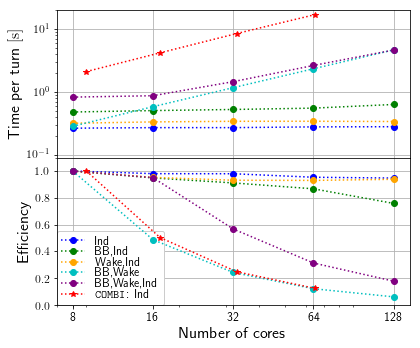

In [19]:
fig2 = plt.figure(2)


fig = plt.figure(1)
ax1 = fig.add_subplot(211)
ax1.set_ylabel(r"Time per turn $[\mathrm{s}]$")

ax2 = fig.add_subplot(212,sharex= ax1)
ax2.set_ylabel("Efficiency")
ax2.set_xlabel("Number of cores")
ax1.grid(True) ; ax2.grid(True)
# ax1.get_xaxis().set_visible(False)


cols = ['b','g','orange','purple','c','r']
ms = ['o','o','o','o','o','*']
if 1:
    XS = [core_inco,core_BB,core_wake,core_wakeBB,core_wakeBBnoI,core_combi]
    YS = [time_inco,time_BB,time_wake,time_wakeBB,time_wakeBBnoI,time_combi]
    labs = ['Ind','BB,Ind','Wake,Ind','BB,Wake,Ind','BB,Wake',r'$\texttt{COMBI}$: Ind']
else:
    XS = [cores11,cores88,cores18]
    YS = [time11,time88,time18]
    labs = ['1 bunch per core proc','8 bunch per 8 core proc','1 bunch per 8 core proc']

for i in [0,1,2,4,3,5]:
    if i ==5 and method>1.3: continue
    print(i,'efficiency',YS[i][0]/YS[i])
    plt.figure(1)
    ax1.loglog(XS[i],YS[i],':'+ms[i],c=cols[i])
    ax2.semilogx(XS[i],YS[i][0]/YS[i],':'+ms[i],c=cols[i],label=labs[i],zorder=3)
    
    #Amdahl
#     popt,pcov = curve_fit(amdahl,XS[i],time_serial/YS[i])
#     temp = np.arange(1,np.max(XS[i])*1.2)
#     if i<2:
#         ax1.loglog(temp,time_serial/amdahl(temp,popt),cols[i],label=r"Amdahl: $p=%.3f$"%popt)
#         ax2.semilogx(temp,amdahl(temp,popt)/temp,cols[i])
#     print('parallel part: ', i,popt)
#     print('speedup',time_serial/YS[i])
#     print('ncores',XS[i])
    
#     plt.figure(2)
#     plt.loglog(XS[i],time_serial/YS[i],''+ms[i]+cols[i])
#     if i<2:
#         plt.loglog(temp,amdahl(temp,popt),cols[i],label=r"Amdahl: $p=%.3f$"%popt)
    
    
plt.figure(1)
ax2.set_ylim(0,1.1)
# ax1.set_ylim(0.01,1)
# ax1.legend(loc=0,framealpha=0.5)
ax2.legend(loc=(0,0),framealpha=1,labelspacing=0).set_zorder(2)
# ax1.set_xticks(2**np.arange(3,8))
# ax2.set_xticks(2**np.arange(3,8))
ax1.tick_params(labelbottom=False)
ax2.set_xticklabels(2**np.arange(8))
ax1.set_ylim(0.09,20)


ax1.set_xticks(2**np.arange(3,8))
ax2.set_xticks(2**np.arange(3,8))
ax2.set_xticklabels(2**np.arange(3,8))
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("00_Plots/PHPC_weakscaling"+wsuffix+"_%d.png"%method)
plt.savefig("00_Plots/PHPC_weakscaling"+wsuffix+"_%d.eps"%method)


# plt.figure(2)

In [74]:
['']*3

['', '', '']